# Handwritten Digit Recognizer Using Convolutional Neural Network (CNN ) and LeNet models.

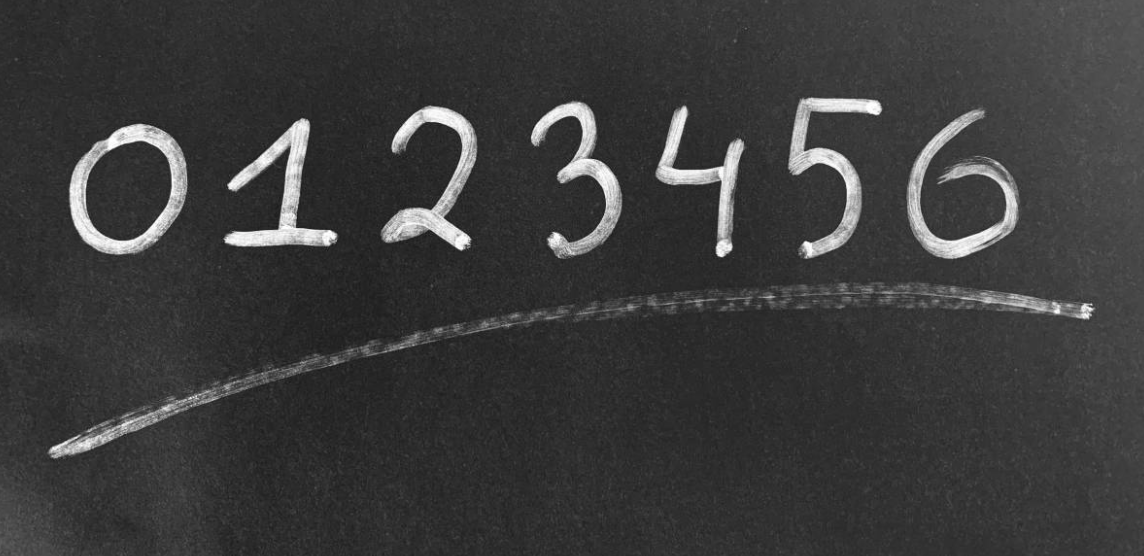

In [ ]:
from IPython.display import Image
Image("c.jpg")

# In this notebook, we will identify digits from a dataset of tens of thousands of handwritten images, by using convolutional neural networks (CNN).MNIST handwritten digit dataset is used to train and test the CNN and LeNet models.

# Table of Content


     1- IMPORTING LIBRARIES

     2- LOADING DATASET
     
     3- Data Processing

     4- Build the Neural Network
     
     5- Compile Model
     
     6- Train the Model
     
     7- Evaluate The Model
     
     8- Make Predicting Labels

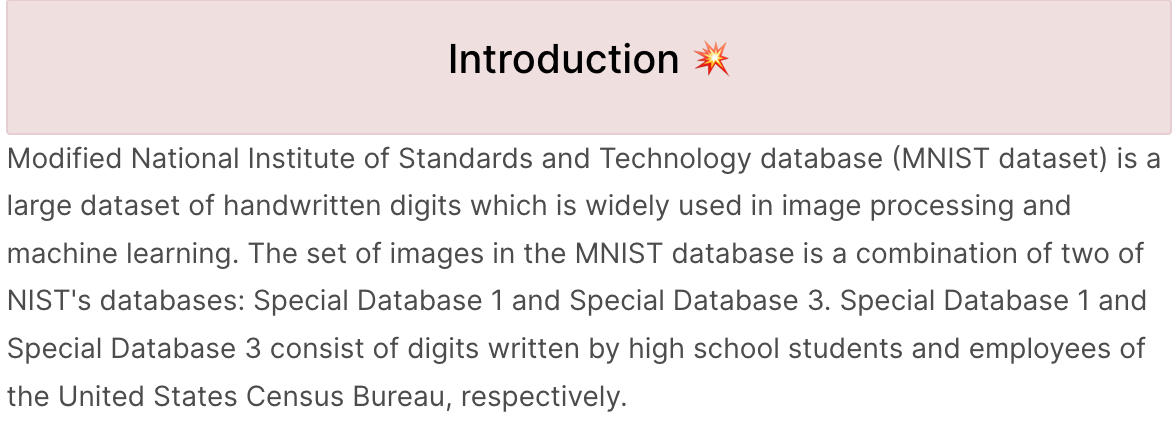

In [ ]:
Image("c4.jpg")

# Problem Statement :


#     We aim to correctly identify digits from a dataset of tens of thousands of handwritten images

# Approach :


#    We will be using Keras (with TensorFlow as our backend) as the main package to create a simple neural network to predict, as accurately as we can, digits from handwritten images.

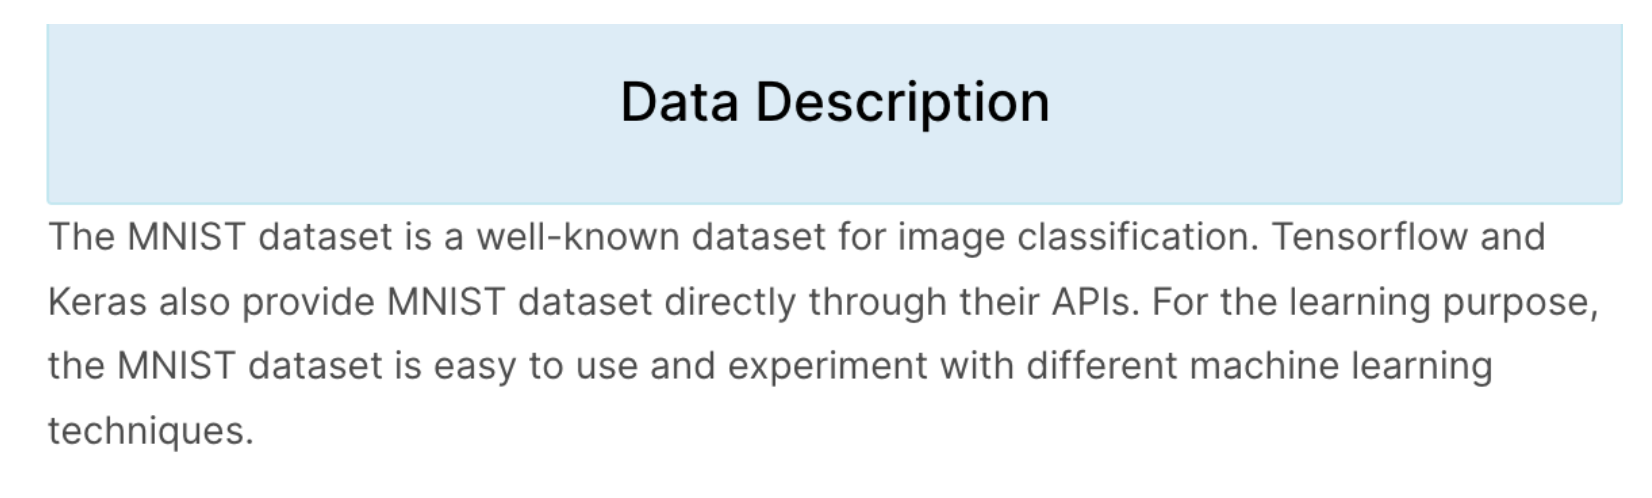

In [ ]:
Image("c2.jpg")

# Data Description


    1- The data files has train.csv and test.csv contain gray-scale images of hand-drawn digits, each image has      labeled from 0-9.
   
    2- Dataset size 60,000 samples of handwritten images.And has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

    3- The size of each image is 28x28 pixels.

    4- Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.


# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow as tf
import os
import tqdm
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras import Sequential
from PIL import Image
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-12-01 14:49:01.187145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loading the data

In [ ]:
test = pd.read_csv('/Users/ghadeer/Documents/master material/Deep Learning/Assignment3/test.csv')
train = pd.read_csv('/Users/ghadeer/Documents/master material/Deep Learning/Assignment3/train.csv')

In [ ]:
# print the shape of train and test data
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


Image size

Training set has 42,000 images. And has 785 columns, 1st coloumn is label for the image and rest 784 are the pixel values.

# Data Processing

- We will make test set and train set from given train set
- x has features
- y has target value

In [ ]:
#1.Defining independent and dependent attributes in training and test sets
x=train.drop(["label"],axis =1).values
y=train["label"].values


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


- Label Encoding of y
- One Hot Encode Target Values

In [ ]:
#2.chnage the labels into categorical data(One Hot encoding to the labels.)
y = tf.keras.utils.to_categorical(y)
y.shape

(42000, 10)

- Reshape Grayscale Images to have a single channel

In [ ]:
#3.dividing all the values in this x by 255.0
x=x/255.0

In [ ]:
#4.Split the training and testing data into 80 and 20 configuration
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((29400, 784), (12600, 784), (29400, 10), (12600, 10))

In [ ]:
print(f'Size of Images is : {len(x_train[1])}x{len(x_train[2])}')

Size of Images is : 784x784


In [ ]:

#5.Reshape data (dimensions) of an array to 3D shape (28, 28,1),28 Width,28 Height(in pixels),1 represents grayscale image
x_train =x_train.reshape(x_train.shape[0],28,28,1)
x_test =x_test.reshape(x_test.shape[0],28,28,1)
x_train.shape, x_test.shape


((29400, 28, 28, 1), (12600, 28, 28, 1))

Imbalanced data:

Imbalanced data isn't necessarily a negative thing, as there is always some degree of imbalance in actual data sets. However, if the amount of imbalance is minor, your model performance should be unaffected. So we are going to check if we have a banlaced data or imbalanced data! from the following numbers it is clear that we hav a blanced data so we can proceed it for model training.

In [ ]:
print(f'Number of samples in  testing dataset for {classes[0]} class are : {np.count_nonzero(x_train[0]) + np.count_nonzero(x_test[0])}')
print(f'Number of samples in  testing dataset for {classes[1]} class are : {np.count_nonzero(x_train[1]) + np.count_nonzero(x_test[1])}')
print(f'Number of samples in  testing dataset for {classes[2]} class are : {np.count_nonzero(x_train[2]) + np.count_nonzero(x_test[2])}')
print(f'Number of samples in  testing dataset for {classes[3]} class are : {np.count_nonzero(x_train[3]) + np.count_nonzero(x_test[3])}')
print(f'Number of samples in  testing dataset for {classes[4]} class are : {np.count_nonzero(x_train[4]) + np.count_nonzero(x_test[4])}')
print(f'Number of samples in  testing dataset for {classes[5]} class are : {np.count_nonzero(x_train[5]) + np.count_nonzero(x_test[5])}')
print(f'Number of samples in  testing dataset for {classes[6]} class are : {np.count_nonzero(x_train[6]) + np.count_nonzero(x_test[6])}')
print(f'Number of samples in  testing dataset for {classes[7]} class are : {np.count_nonzero(x_train[7]) + np.count_nonzero(x_test[7])}')
print(f'Number of samples in  testing dataset for {classes[8]} class are : {np.count_nonzero(x_train[8]) + np.count_nonzero(x_test[8])}')
print(f'Number of samples in  testing dataset for {classes[9]} class are : {np.count_nonzero(x_train[9]) + np.count_nonzero(x_test[9])}')

Number of samples in  testing dataset for 0 class are : 252
Number of samples in  testing dataset for 1 class are : 189
Number of samples in  testing dataset for 2 class are : 304
Number of samples in  testing dataset for 3 class are : 282
Number of samples in  testing dataset for 4 class are : 220
Number of samples in  testing dataset for 5 class are : 422
Number of samples in  testing dataset for 6 class are : 295
Number of samples in  testing dataset for 7 class are : 358
Number of samples in  testing dataset for 8 class are : 293
Number of samples in  testing dataset for 9 class are : 221


In [ ]:
print(f'Number of samples in training dataset for {classes[0]} class are : {np.count_nonzero(x_train[0])}')
print(f'Number of samples in training dataset for {classes[1]} class are : {np.count_nonzero(x_train[1])}')
print(f'Number of samples in training dataset for {classes[2]} class are : {np.count_nonzero(x_train[2])}')
print(f'Number of samples in training dataset for {classes[3]} class are : {np.count_nonzero(x_train[3])}')
print(f'Number of samples in training dataset for {classes[4]} class are : {np.count_nonzero(x_train[4])}')
print(f'Number of samples in training dataset for {classes[5]} class are : {np.count_nonzero(x_train[5])}')
print(f'Number of samples in training dataset for {classes[6]} class are : {np.count_nonzero(x_train[6])}')
print(f'Number of samples in training dataset for {classes[7]} class are : {np.count_nonzero(x_train[7])}')
print(f'Number of samples in training dataset for {classes[8]} class are : {np.count_nonzero(x_train[8])}')
print(f'Number of samples in training dataset for {classes[9]} class are : {np.count_nonzero(x_train[9])}')

Number of samples in training dataset for 0 class are : 113
Number of samples in training dataset for 1 class are : 126
Number of samples in training dataset for 2 class are : 175
Number of samples in training dataset for 3 class are : 141
Number of samples in training dataset for 4 class are : 66
Number of samples in training dataset for 5 class are : 291
Number of samples in training dataset for 6 class are : 129
Number of samples in training dataset for 7 class are : 150
Number of samples in training dataset for 8 class are : 133
Number of samples in training dataset for 9 class are : 156


Distribution for each class in train dataset

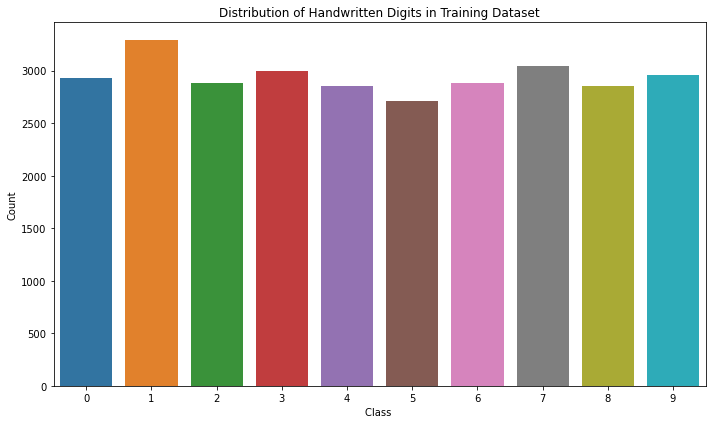

In [ ]:

nClasses, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)

classes_name = [str(label) for label in nClasses]

plt.figure(figsize=(10, 6))
sns.barplot(classes_name, counts)
plt.xlabel('Class ')
plt.ylabel('Count')
plt.title('Distribution of Handwritten Digits in Training Dataset')
plt.tight_layout()
plt.show()


Distribution for each class in test dataset

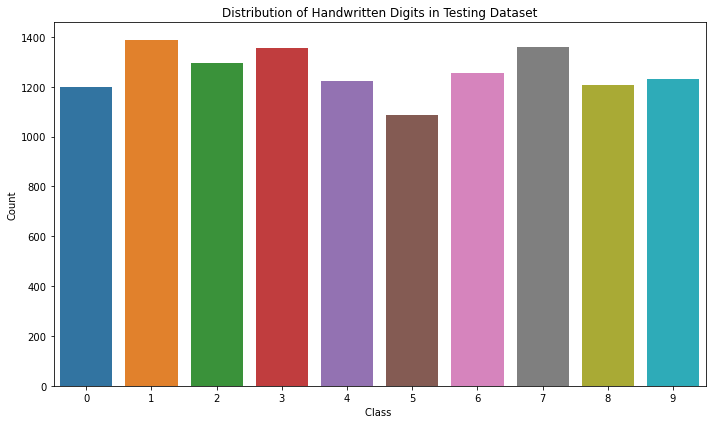

In [ ]:
nClasses, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)

classes_name = [str(label) for label in nClasses]

plt.figure(figsize=(10, 6))
sns.barplot(classes_name, counts)
plt.xlabel('Class ')
plt.ylabel('Count')
plt.title('Distribution of Handwritten Digits in Testing Dataset')
plt.tight_layout()
plt.show()


# Displaying Training and Testing Data

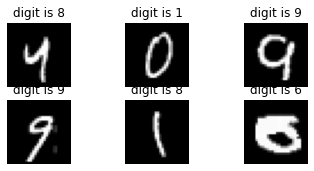

In [ ]:
# Display the 6 image in training data

for i in range(6):
    plt.subplot(330 +1 +i)
    plt.imshow(x_train[i],cmap = plt.get_cmap('gray'))
    digit = np.argmax(y_test[i])
    plt.title(f"digit is {digit}")
    plt.axis('off')
plt.show()


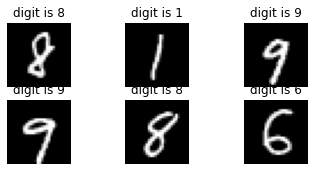

In [ ]:
# Display the first image in testing data

for i in range(6):
    plt.subplot(330 +1 +i)
    plt.imshow(x_test[i],cmap = plt.get_cmap('gray'))
    digit = np.argmax(y_test[i])
    plt.title(f"digit is {digit}")
    plt.axis('off')
plt.show()

# Build the CNN Models

Hand Digit Recognizer CNN Architecture

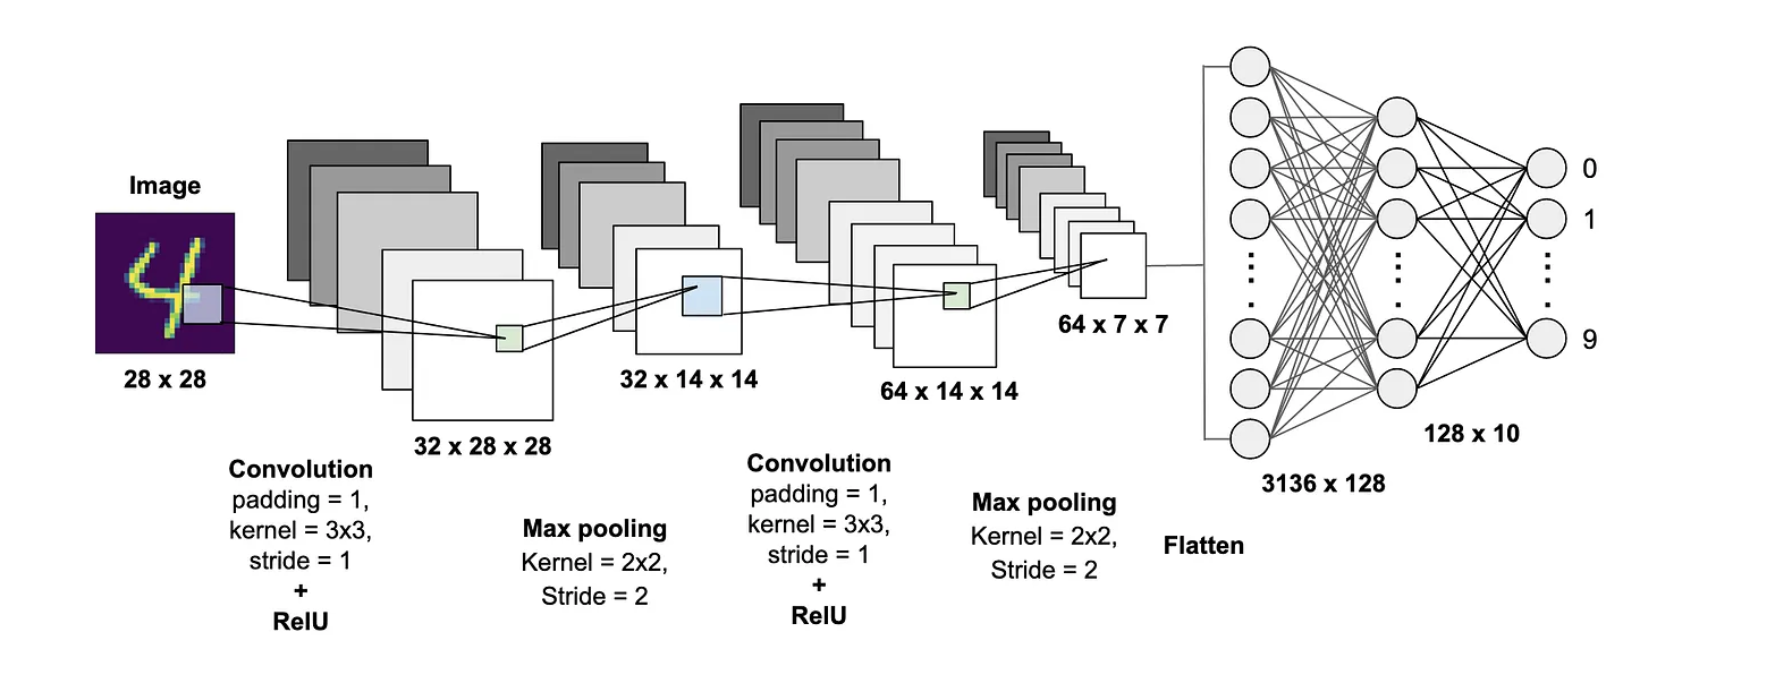

In [ ]:
from IPython.display import Image
Image("c11.jpg")

In [ ]:
#create CNN model
model=models.Sequential()

model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", padding ='same',input_shape=(28,28,1)))

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",padding ='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",padding ='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu",padding ='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))


# Compile Model

In [ ]:
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0

# Train the Model

In [ ]:

history = model.fit(x_train, y_train, epochs=5,batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/5
460/460 [==============================] - 64s 135ms/step - loss: 0.1922 - accuracy: 0.9578 - val_loss: 0.6405 - val_accuracy: 0.8107
Epoch 2/5
460/460 [==============================] - 63s 137ms/step - loss: 0.0876 - accuracy: 0.9821 - val_loss: 0.1175 - val_accuracy: 0.9770
Epoch 3/5
460/460 [==============================] - 61s 133ms/step - loss: 0.0513 - accuracy: 0.9887 - val_loss: 0.0978 - val_accuracy: 0.9779
Epoch 4/5
460/460 [==============================] - 61s 133ms/step - loss: 0.0469 - accuracy: 0.9899 - val_loss: 0.0980 - val_accuracy: 0.9836
Epoch 5/5
460/460 [==============================] - 62s 134ms/step - loss: 0.0345 - accuracy: 0.9915 - val_loss: 0.0888 - val_accuracy: 0.9833


# Plot the Accuracy Graph

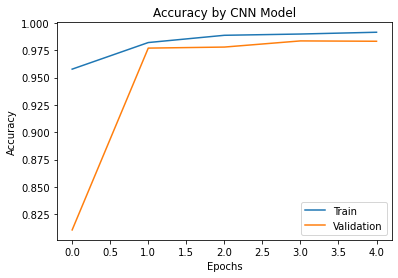

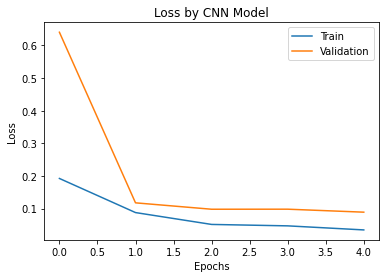

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by CNN Model")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by CNN Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
#Save the model parameters
model.save("handwritten.h55")

INFO:tensorflow:Assets written to: handwritten.h55/assets


INFO:tensorflow:Assets written to: handwritten.h55/assets


# Evaluate The Model

# 1.Accuracy

In [ ]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)


394/394 [==============================] - 7s 18ms/step - loss: 0.0888 - accuracy: 0.9833


# 2.Confusion Matrix

394/394 [==============================] - 7s 18ms/step


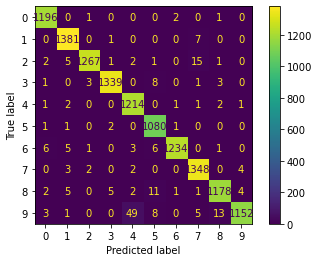

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

if len(y_test.shape) > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

y_predictions = model.predict(x_test)
y_predictions = np.argmax(y_predictions, axis=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_labels, y_predictions)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Test accuracy:", accuracy_score(y_test_labels, y_predictions))

Test accuracy: 0.9832539682539683


In [ ]:
print(classification_report(y_test_labels, y_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1200
           1       0.98      0.99      0.99      1389
           2       0.99      0.98      0.99      1294
           3       0.99      0.99      0.99      1355
           4       0.95      0.99      0.97      1222
           5       0.97      1.00      0.98      1085
           6       1.00      0.98      0.99      1256
           7       0.98      0.99      0.99      1359
           8       0.98      0.97      0.98      1209
           9       0.99      0.94      0.96      1231

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



# 3.The Area Under the Receiver Operating Characteristic Curve (AUC-ROC)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_binarized.shape[1]
y_pred_probs = model.predict(x_test)

394/394 [==============================] - 7s 18ms/step


In [ ]:

# Calculate multi-class ROC AUC
roc_auc = roc_auc_score(y_test_binarized,y_pred_probs,multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.999776872739494


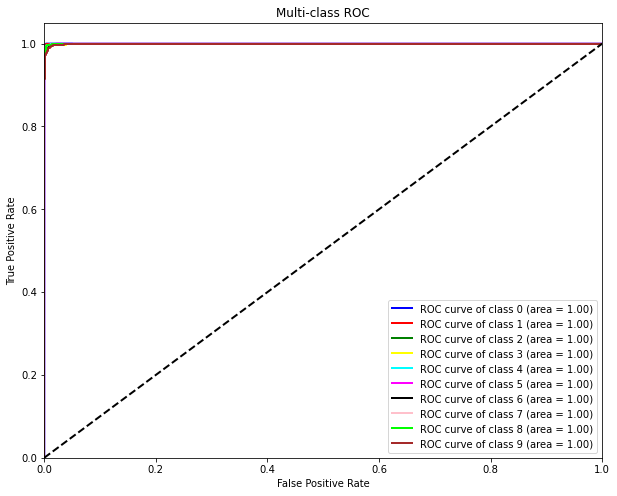

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan', 'magenta', 'black', 'pink', 'lime', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


# 8. Make Predicting Labels

# 1.From Test Dataset

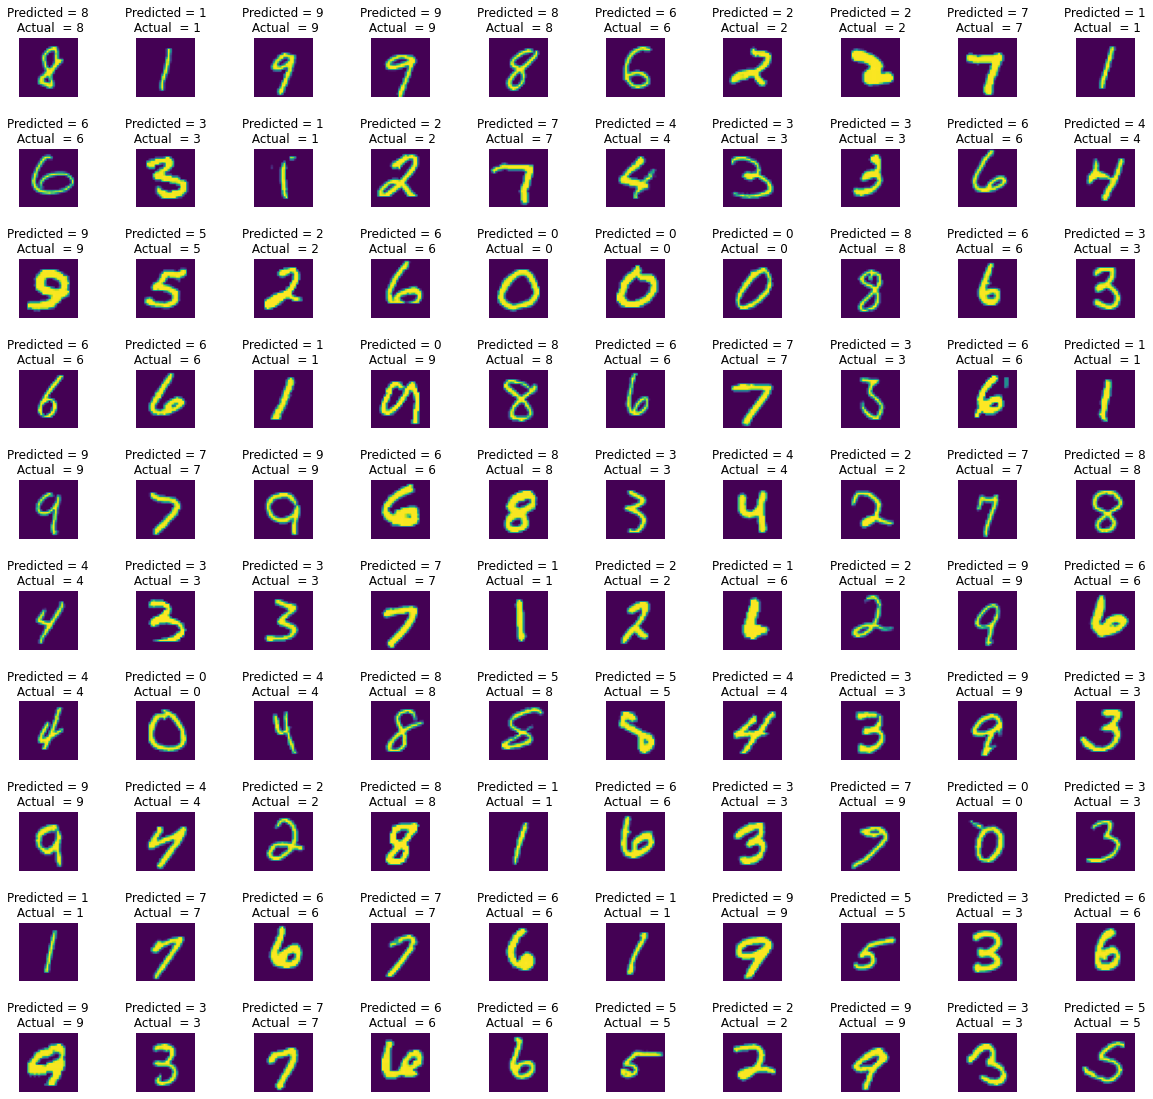

In [ ]:
L =10
W = 10
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]],classes[y_test_labels[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# 2.From New Dataset

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

model_path = "handwritten.h55"
new_dataset_path = "/Users/ghadeer/Documents/master material/Deep Learning/Assignment3/test.csv"

model = load_model(model_path)

newtest = pd.read_csv(new_dataset_path)

print(newtest.shape)

newtest = newtest / 255.0
newtest = newtest.values.reshape(-1, 28, 28, 1)

predictions = model.predict(newtest)

predicted_labels = np.argmax(predictions, axis=1)

print(predicted_labels)


(28000, 784)
875/875 [==============================] - 16s 18ms/step
[2 0 9 ... 3 9 2]


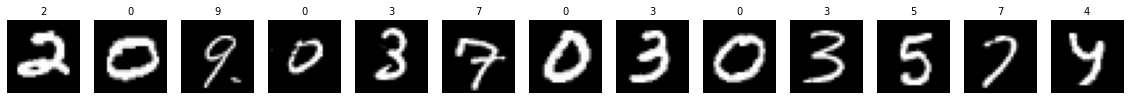

In [ ]:

num_images = 13
fig, axes = plt.subplots(1, num_images, figsize=(20, 2))

for i, ax in enumerate(axes):
    ax.imshow(newtest[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'{predicted_labels[i]}', fontsize=10)
    ax.axis('off')  # Turn off the axis

plt.show()

# 2.Build the LeNet Model

In 1998 Yann LeCun,Patrick Haffner, Yoshua Bengio and Leon Bottou propose an algorithim known as LeNet in their research paper https://ieeexplore.ieee.org/document/726791 . This is a type of convolution neural network as it contains convolution layers however it is standard form of neural network to solve the tasks related to images, like face and object detection estimation for pose in an image etc. LeNet is a convolution neural network with total seven layers, three of which are convolution layers and two of them are subsampling while two are fully connected layers. Although in first layer nothing is learnt by model thats why it is commonly not considered as a layer of network but it is input layer.

Cx is denoting convolutional layers Sx is for subsampling layers. x is denoting the sequential position of layer Fx is denoting Fully connected layers. All layers can be seen in above image, the architecture of LeNet.C1 is the first layer which is producing output of 6 feature maps. There is 5x5 kernel or filter size with stride of 1. Fiter or Kernel is a window that consists on weights and used with input values.

Activation Function:

To introduce non linearties in neural network a methematical operation is used that transforms the signals of neurons in a scaled output. This is known as Activation function. There are different types of activation functions but we used Relu activation function in all layers.

'Relu(Rectified Linear Unit)' is defined as:

f(x) = max(0,x)

For the higher +ve values of z, the slope of f(z)=max(0,z) is not close to zero.



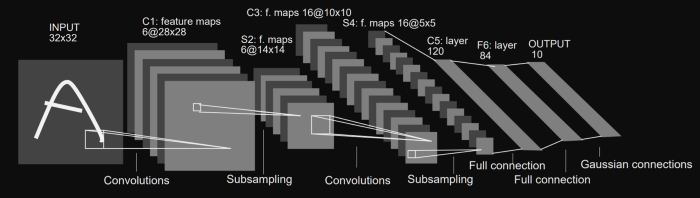

In [ ]:
Image("c5.jpg")

In [ ]:
#1. LeNet-5 Model
import tensorflow as tf
from tensorflow import keras

lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size = (3,3), strides=1,  activation='relu', input_shape=(28,28,1),
                        padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size = (3,3), strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size = (3,3), strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #@output layer
])


First, we create objects of the tf.keras.Sequential class constructor and assign the variable "lenet" to it. We then go on to specify the levels of our model within the class constructor. The tf.keras.layers are what we're utilising.

Conv2D class is used to build the network's convolutional layers. A few parameters that we pass are mentioned below. Activation Function: A computational procedure that produces a normalised output from the result or impulses of neurons. An element of a neural network which adds non-linearity into the network is the activation function. The activation function gives the neural network more representational capacity and the ability to handle challenging problems. With a few different values supplied for the parameters, the other convolutional layers use the same layer specification as C1 as their starting point.

Subsampling layers were used in the original work that established the LeNet-5 architecture. The mean of the pixel values that fell inside the 2x2 pooling window was calculated within the subsampling layer, and the value was then multiplied by a coefficient value. All of this is done prior to the data being sent via activation function, and the final result is then added with a bias.

However, we are using the tf.keras.layers in our constructed LeNet neural network. Constructor for AveragePooling2D. The constructor does not receive any arguments since it initialises certain default parameters for the needed parameters when it is called. Keep in mind that the feature maps' purpose in the network ought to be down sampled as they travel through the pooling layer.

The network has two additional kinds of layers: flattening layers and dense layers. The class function Object() { [native code] } tf.keras.layers is used to build the flatten layer. Flatten.

This layer's function is to convert the input into a 1-dimensional array so that it may be fed into the succeeding dense levels.

The output layer contains 10 units, whereas each of the dense layers—F6 has 84—has a certain quantity of units or neurons. The 10 units in the final dense layer represent the quantity of classes in the MNIST data. A soft - max function serves as the output layer's activation function.

In order to determine the distribution o probability of a group of integers included into an input vector, the activation function known as Softmax is used. The result of a softmax activation function is a vector whose collection of values indicates the likelihood that a class or event will occur. The vector's values sum up to one when totaled.



# Compile Model

In [ ]:
from tensorflow.keras.losses import categorical_crossentropy

lenet.compile(optimizer='Adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [ ]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 120)         17400     
                                                                 
 flatten_1 (Flatten)         (None, 1920)             

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((29400, 784), (12600, 784), (29400, 10), (12600, 10))

In [ ]:
x_train =x_train.reshape(x_train.shape[0],28,28,1)
x_test =x_test.reshape(x_test.shape[0],28,28,1)
x_train.shape, x_test.shape

((29400, 28, 28, 1), (12600, 28, 28, 1))

# Train the Model

In [ ]:
hist = lenet.fit(x_train, y_train, epochs=5,batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/5
460/460 [==============================] - 8s 15ms/step - loss: 0.3632 - accuracy: 0.8910 - val_loss: 0.1433 - val_accuracy: 0.9578
Epoch 2/5
460/460 [==============================] - 6s 14ms/step - loss: 0.1018 - accuracy: 0.9690 - val_loss: 0.0885 - val_accuracy: 0.9746
Epoch 3/5
460/460 [==============================] - 6s 14ms/step - loss: 0.0677 - accuracy: 0.9781 - val_loss: 0.0661 - val_accuracy: 0.9804
Epoch 4/5
460/460 [==============================] - 6s 13ms/step - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0592 - val_accuracy: 0.9833
Epoch 5/5
460/460 [==============================] - 6s 14ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0532 - val_accuracy: 0.9842


# Plot the Accuracy Graph

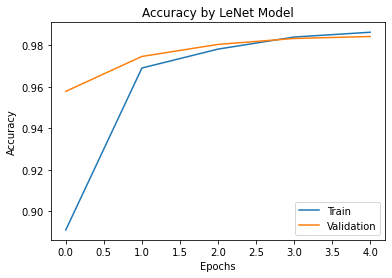

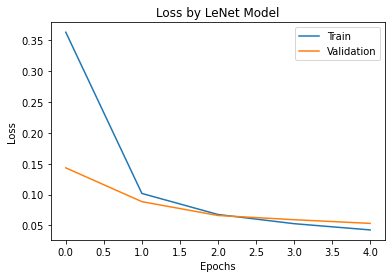

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet Model")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
model.save("handwritten.h66")

INFO:tensorflow:Assets written to: handwritten.h66/assets


INFO:tensorflow:Assets written to: handwritten.h66/assets


# Evaluate The Model

# 1.Accuracy

In [ ]:
# Final evaluation of the model
scores1 = lenet.evaluate(x_test, y_test, verbose=1)

394/394 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9842


# 2.Confusion Matrix

394/394 [==============================] - 1s 2ms/step


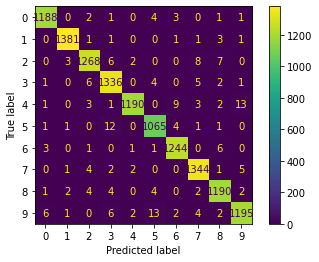

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

if len(y_test.shape) > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

y_predictions = lenet.predict(x_test)
y_predictions = np.argmax(y_predictions, axis=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_labels, y_predictions)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
print("Test accuracy:", accuracy_score(y_test_labels, y_predictions))

Test accuracy: 0.9842063492063492


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(y_test_labels, y_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1200
           1       0.99      0.99      0.99      1389
           2       0.98      0.98      0.98      1294
           3       0.98      0.99      0.98      1355
           4       0.99      0.97      0.98      1222
           5       0.98      0.98      0.98      1085
           6       0.98      0.99      0.99      1256
           7       0.98      0.99      0.99      1359
           8       0.98      0.98      0.98      1209
           9       0.98      0.97      0.98      1231

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



# 3.The Area Under the Receiver Operating Characteristic Curve (AUC-ROC)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_binarized.shape[1]
y_pred_probs = lenet.predict(x_test)


394/394 [==============================] - 1s 3ms/step


In [ ]:
# Calculate multi-class ROC AUC
roc_auc = roc_auc_score(y_test_binarized,y_pred_probs,multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.999720400903319


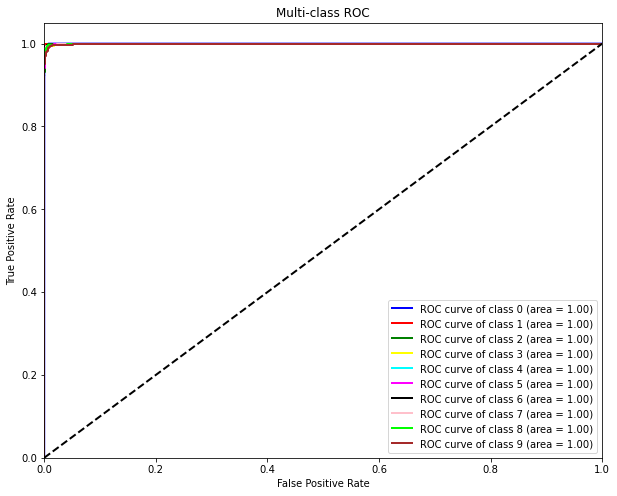

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan', 'magenta', 'black', 'pink', 'lime', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


# Make Predicting Labels

# 1.From Test dataset

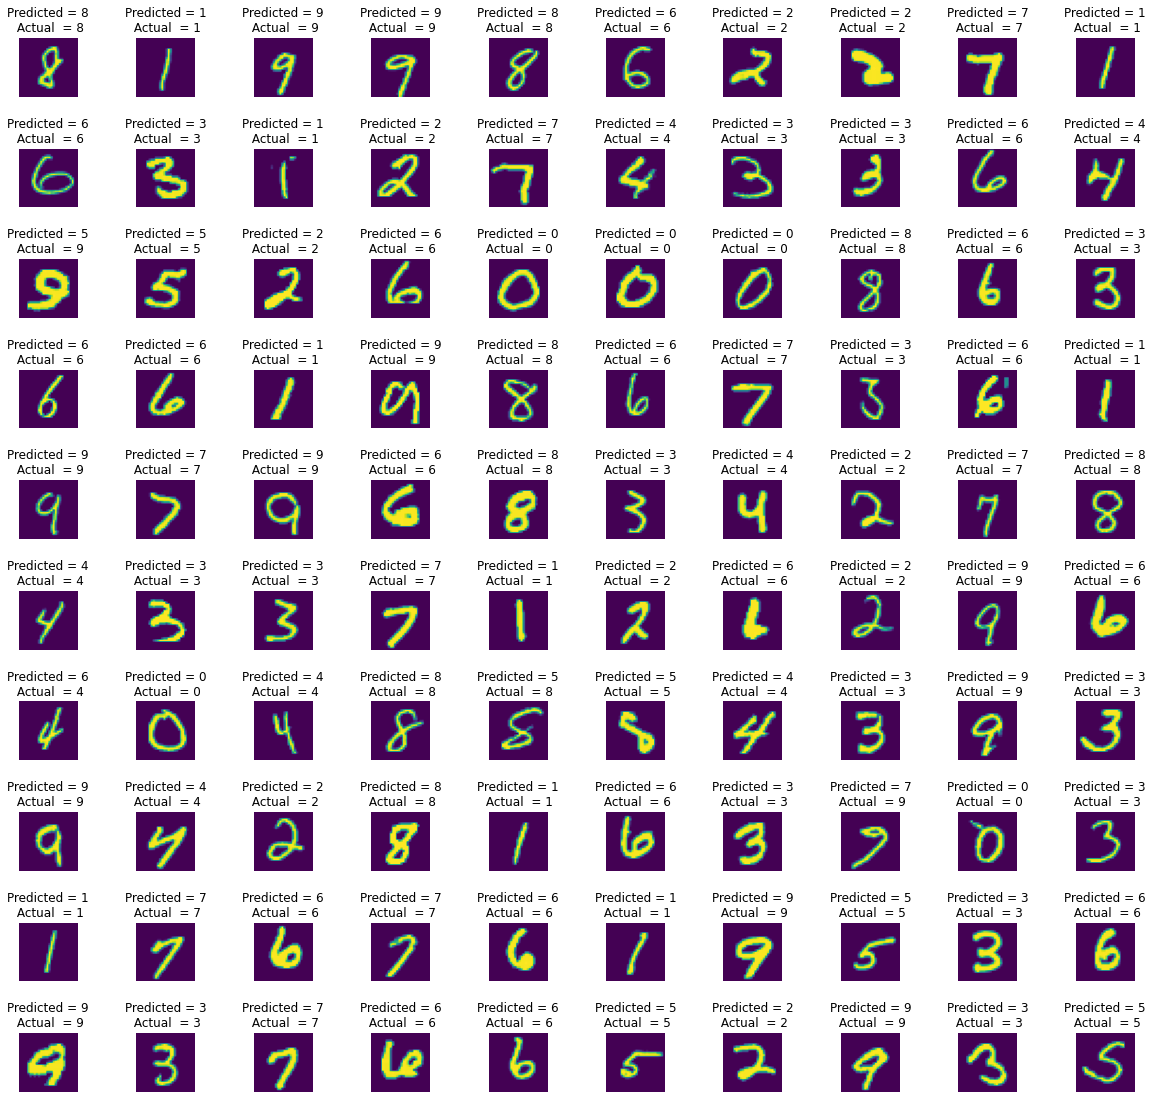

In [ ]:
L =10
W = 10
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]],classes[y_test_labels[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# 2.From New Dataset

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

model_path = "handwritten.h66"
new_dataset_path = "/Users/ghadeer/Documents/master material/Deep Learning/Assignment3/test.csv"

model = load_model(model_path)

newtest = pd.read_csv(new_dataset_path)

print(newtest.shape)



newtest = newtest / 255.0


newtest = newtest.values.reshape(-1, 28, 28, 1)



predictions = model.predict(newtest)

predicted_labels = np.argmax(predictions, axis=1)

print(predicted_labels)


(28000, 784)
875/875 [==============================] - 16s 18ms/step
[2 0 9 ... 3 9 2]


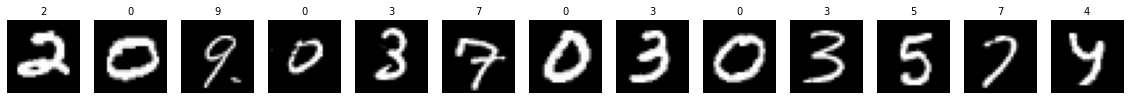

In [ ]:

num_images = 13
fig, axes = plt.subplots(1, num_images, figsize=(20, 2))

for i, ax in enumerate(axes):
    ax.imshow(newtest[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'{predicted_labels[i]}', fontsize=10)
    ax.axis('off')

plt.show()

# Compare the accuracies of  CNN and LeNet models

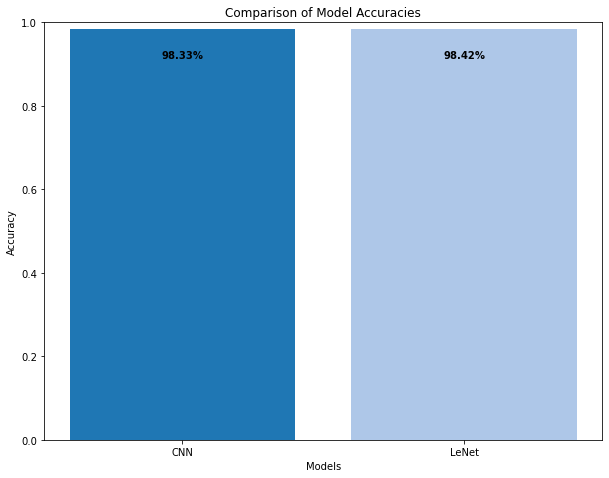

In [ ]:

# Names of models
models = ['CNN', 'LeNet']

# Accuracies
accuracies = [scores[1], scores1[1]]

plt.figure(figsize=(10, 8))
bars = plt.bar(models, accuracies, color=['#1f77b4', '#aec7e8'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, f'{yval:.2%}', va='top', ha='center', color='black', fontweight='bold')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])

plt.subplots_adjust(top=0.85)

plt.show()


# LEARNING RATE FOR BOTH MODEL

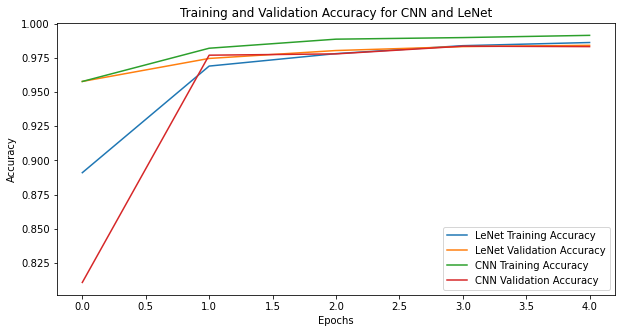

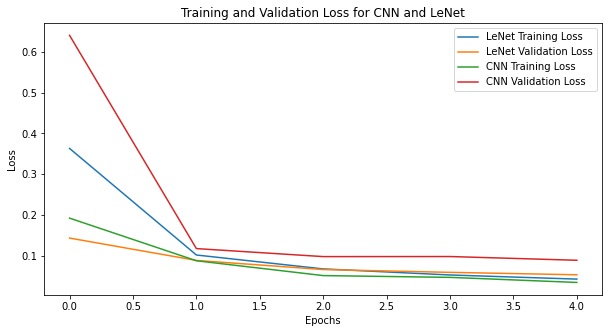

In [ ]:

# Plot for Accuracy Comparison
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'], label='LeNet Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='LeNet Validation Accuracy')
plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Training and Validation Accuracy for CNN and LeNet')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

# Plot for Loss Comparison
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='LeNet Training Loss')
plt.plot(hist.history['val_loss'], label='LeNet Validation Loss')
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.title('Training and Validation Loss for CNN and LeNet')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()


# =========

# THANK TOU